In [101]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [81]:
DATA_PATH = "data.csv"

In [82]:
data = pl.read_csv(DATA_PATH)

In [83]:
data.head()

NOUN,ADP,PUNCT,DET,VERB,ADJ,AUX,CCONJ,NUM,PRON,ADV,PROPN,SCONJ,X,file_name,SYM,SPACE,INTJ,nominality,nominality_wider,avg_article_length,avg_section_length,len_in_words,name,type,year
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
1433,979,619,511,422,398,200,155,144,109,100,47,44,17,"""1927_1443.txt""",0.0,0.0,0.0,3.4,3.43,68.23,67.17,4431,"""geologic and mining law""","""administrative""",1927
19159,14138,12082,6564,6046,5924,2413,3697,3504,2566,2007,938,1057,8,"""1930_1398.txt""",1.0,0.0,0.0,3.17,3.79,94.28,94.01,66694,"""penal code""","""penal""",1930
13563,9178,8935,4848,4155,3426,1902,1732,2135,1729,1474,571,834,5,"""1940_1443.txt""",1.0,0.0,0.0,3.26,3.54,89.18,88.82,44189,"""civil procedure""","""civil""",1940
13485,10116,5918,4330,3467,3982,1244,2294,1787,1296,1065,463,411,120,"""1941_633.txt""",3.0,0.0,0.0,3.89,4.46,139.54,60.38,42723,"""author and ip""","""civil""",1941
23239,15881,13418,8634,7668,5675,3896,3264,2357,3502,2489,780,1380,20,"""1942_262.txt""",1.0,1.0,0.0,3.03,3.07,61.07,60.81,75968,"""civil code""","""civil""",1942


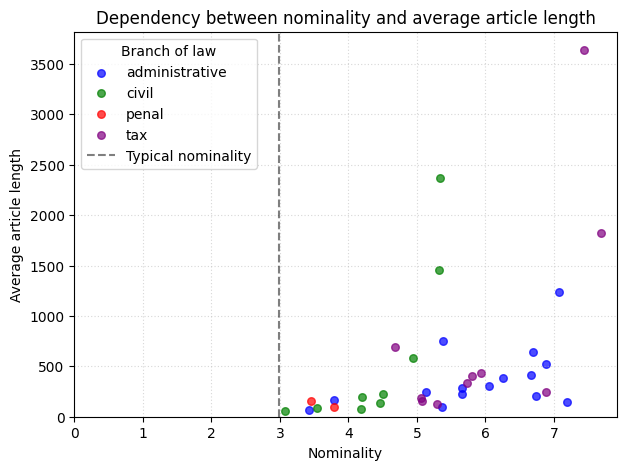

In [84]:
# Definiujemy mapowanie typów na kolory
type_colors = {
    'administrative': 'blue',
    'civil': 'green',
    'penal': 'red',
    'tax': 'purple',
}

plt.figure(figsize=(7, 5))

# Tworzymy wykres dla każdego typu osobno
for law_type, color in type_colors.items():
    mask = data['type'] == law_type
    plt.scatter(
        data.filter(pl.col("type") == law_type)['nominality_wider'].to_numpy(),
        data.filter(pl.col("type") == law_type)['avg_article_length'].to_numpy(),
        c=color,
        label=law_type,
        s=30,
        alpha=0.7
    )

plt.axvline(x=2.99, color='black', linestyle='--', alpha=0.5, label='Typical nominality')

plt.ylim(0)
plt.xlim(0)
plt.xlabel('Nominality')
plt.ylabel('Average article length')
plt.title('Dependency between nominality and average article length')

plt.legend(title="Branch of law", loc="upper left")
plt.grid(True, linestyle = (0, (1, 2)), alpha = 0.5)

plt.show()

In [103]:
x = data['nominality_wider'].to_numpy()
y = data['avg_article_length'].to_numpy()
mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
x_clean = x[mask]
y_clean = y[mask]

print(f"Number of points before cleaning: {len(x)}")
print(f"Number of points after cleaning: {len(x_clean)}")

pearson_corr, pearson_p = stats.pearsonr(x_clean, y_clean)
spearman_corr, spearman_p = stats.spearmanr(x_clean, y_clean)

print("\nPearson correlation:")
print(f"r = {pearson_corr:.3f}")
print(f"p-value = {pearson_p:.3e}")
print(f"\nSpearman correlation:")
print(f"ρ = {spearman_corr:.3f}")
print(f"p-value = {spearman_p:.3e}")

print("\nPolars correlation:")
print("Pearson correlation:", data.select(pl.corr("nominality_wider", "avg_article_length")).item())
print("Spearman correlation:", data.select(pl.corr("nominality_wider", "avg_article_length", method="spearman")).item())

Number of points before cleaning: 37
Number of points after cleaning: 36

Pearson correlation:
r = 0.461
p-value = 4.655e-03

Spearman correlation:
ρ = 0.635
p-value = 3.228e-05

Polars correlation:
Pearson correlation: 0.4610453109644082
Spearman correlation: 0.6346141587052883


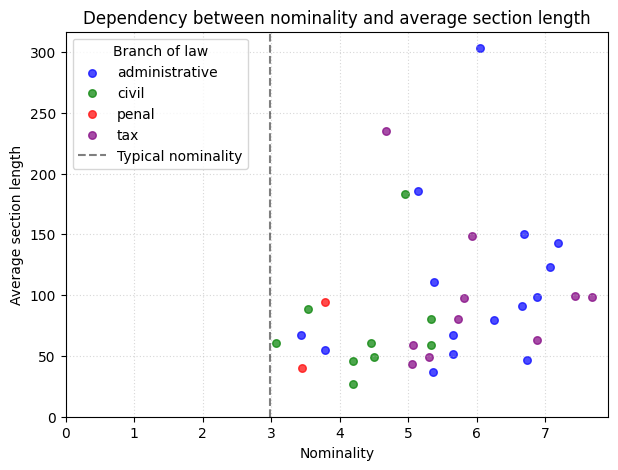

In [85]:
# Definiujemy mapowanie typów na kolory
type_colors = {
    'administrative': 'blue',
    'civil': 'green',
    'penal': 'red',
    'tax': 'purple',
}

plt.figure(figsize=(7, 5))

# Tworzymy wykres dla każdego typu osobno
for law_type, color in type_colors.items():
    mask = data['type'] == law_type
    plt.scatter(
        data.filter(pl.col("type") == law_type)['nominality_wider'].to_numpy(),
        data.filter(pl.col("type") == law_type)['avg_section_length'].to_numpy(),
        c=color,
        label=law_type,
        s=30,
        alpha=0.7
    )

plt.axvline(x=2.99, color='black', linestyle='--', alpha=0.5, label='Typical nominality')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Nominality')
plt.ylabel('Average section length')
plt.title('Dependency between nominality and average section length')

plt.legend(title="Branch of law", loc="upper left")
plt.grid(True, linestyle = (0, (1, 2)), alpha = 0.5)

plt.show()

In [104]:
x = data['nominality_wider'].to_numpy()
y = data['avg_section_length'].to_numpy()
mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
x_clean = x[mask]
y_clean = y[mask]

print(f"Number of points before cleaning: {len(x)}")
print(f"Number of points after cleaning: {len(x_clean)}")

pearson_corr, pearson_p = stats.pearsonr(x_clean, y_clean)
spearman_corr, spearman_p = stats.spearmanr(x_clean, y_clean)

print("\nPearson correlation:")
print(f"r = {pearson_corr:.3f}")
print(f"p-value = {pearson_p:.3e}")
print(f"\nSpearman correlation:")
print(f"ρ = {spearman_corr:.3f}")
print(f"p-value = {spearman_p:.3e}")

print("\nPolars correlation:")
print("Pearson correlation:", data.select(pl.corr("nominality_wider", "avg_section_length")).item())
print("Spearman correlation:", data.select(pl.corr("nominality_wider", "avg_section_length", method="spearman")).item())

Number of points before cleaning: 37
Number of points after cleaning: 36

Pearson correlation:
r = 0.252
p-value = 1.382e-01

Spearman correlation:
ρ = 0.414
p-value = 1.202e-02

Polars correlation:
Pearson correlation: 0.25196373387747045
Spearman correlation: 0.4142369904084417


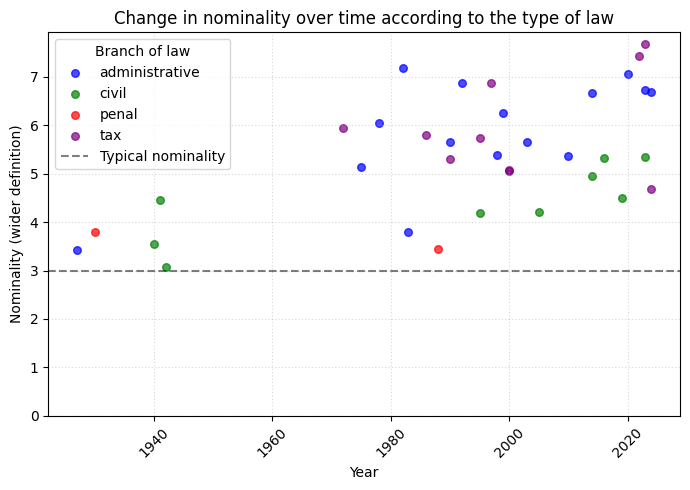

In [86]:
plt.figure(figsize=(7, 5))

# Definiujemy mapowanie typów na kolory
type_colors = {
    'administrative': 'blue',
    'civil': 'green',
    'penal': 'red',
    'tax': 'purple',
}

# Tworzymy wykres dla każdego typu osobno
for law_type, color in type_colors.items():
    mask = data['type'] == law_type
    plt.scatter(
        data.filter(pl.col("type") == law_type)['year'].to_numpy(),
        data.filter(pl.col("type") == law_type)['nominality_wider'].to_numpy(),
        c=color,
        label=law_type,
        s=30,
        alpha=.7
    )

plt.axhline(y=2.99, color='black', linestyle='--', alpha=0.5, label='Typical nominality')
plt.ylim(0)
plt.xlabel('Year')
plt.ylabel('Nominality (wider definition)')
plt.title('Change in nominality over time according to the type of law')

# Dodanie siatki dla lepszej czytelności
plt.grid(True, linestyle= (0, (1, 2)), alpha=.5)

# Ustawienie osi X na lata
plt.xticks(rotation=45)

plt.legend(title="Branch of law", loc="upper left")
plt.tight_layout()  # aby etykiety osi X nie były ucięte

plt.show()

In [105]:
years = data['year'].to_numpy()
nominality = data['nominality_wider'].to_numpy()
mask = ~(np.isnan(nominality) | np.isinf(nominality))
years_clean = years[mask]
nominality_clean = nominality[mask]
pearson_corr, pearson_p = stats.pearsonr(years_clean, nominality_clean)
spearman_corr, spearman_p = stats.spearmanr(years_clean, nominality_clean)

print("Time trend analysis:")
print(f"Pearson correlation: r = {pearson_corr:.3f}, p-value = {pearson_p:.3e}")
print(f"Spearman correlation: ρ = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")

# Dodatkowo możemy sprawdzić, czy trend jest istotny dla każdego typu prawa osobno
print("\nTime trend analysis according to the type of law:")
for law_type in type_colors.keys():
    law_data = data.filter(pl.col("type") == law_type)
    years_law = law_data['year'].to_numpy()
    nominality_law = law_data['nominality_wider'].to_numpy()
    
    # Usuwamy NaN i inf
    mask = ~(np.isnan(nominality_law) | np.isinf(nominality_law))
    years_law_clean = years_law[mask]
    nominality_law_clean = nominality_law[mask]
    
    if len(years_law_clean) > 1:  # sprawdzamy czy mamy wystarczająco danych
        pearson_corr, pearson_p = stats.pearsonr(years_law_clean, nominality_law_clean)
        spearman_corr, spearman_p = stats.spearmanr(years_law_clean, nominality_law_clean)
        
        print(f"\n{law_type}:")
        print(f"Pearson correlation: r = {pearson_corr:.3f}, p-value = {pearson_p:.3e}")
        print(f"Spearman correlation: ρ = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")

Time trend analysis:
Pearson correlation: r = -0.198, p-value = 2.400e-01
Spearman correlation: ρ = 0.331, p-value = 4.529e-02

Time trend analysis according to the type of law:

administrative:
Pearson correlation: r = 0.683, p-value = 5.016e-03
Spearman correlation: ρ = 0.486, p-value = 6.615e-02

civil:
Pearson correlation: r = 0.770, p-value = 1.527e-02
Spearman correlation: ρ = 0.817, p-value = 7.225e-03

penal:
Pearson correlation: r = -1.000, p-value = 1.000e+00
Spearman correlation: ρ = -1.000, p-value = nan

tax:
Pearson correlation: r = 0.304, p-value = 3.939e-01
Spearman correlation: ρ = -0.085, p-value = 8.152e-01


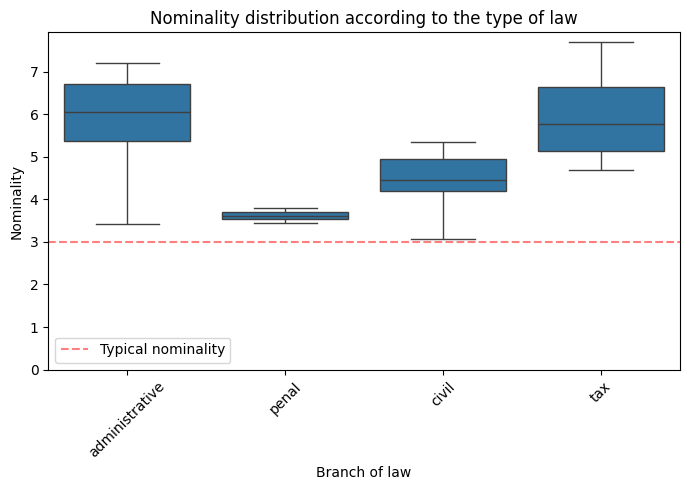

In [87]:
plt.figure(figsize=(7, 5))

# Boxplot
sns.boxplot(data=data, x='type', y='nominality_wider')

# Dodanie linii poziomej na 2.99
plt.axhline(y=2.99, color='red', linestyle='--', alpha=0.5, label='Typical nominality')

plt.title('Nominality distribution according to the type of law')
plt.xlabel('Branch of law')
plt.ylabel('Nominality')
plt.xticks(rotation=45)

# Dodanie legendy
plt.ylim(0)
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
type_nominality = []
for law_type in type_colors.keys():
    type_data = data.filter(pl.col("type") == law_type)['nominality_wider'].to_numpy()
    # Usuwamy NaN i inf
    type_data = type_data[~(np.isnan(type_data) | np.isinf(type_data))]
    if len(type_data) > 0:  # sprawdzamy czy mamy jakieś dane po czyszczeniu
        type_nominality.append(type_data)

f_stat, p_value = stats.f_oneway(*type_nominality)

print("ANOVA test for differences in nominality between types of law:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3e}")

# Dodatkowo wykonujemy testy post-hoc (Tukey HSD) aby sprawdzić, które pary typów różnią się istotnie
from statsmodels.stats.multicomp import MultiComparison
import numpy as np

# Przygotowanie danych do testu post-hoc
all_nominality = np.concatenate(type_nominality)
all_types = np.concatenate([[law_type] * len(nom) for law_type, nom in zip(type_colors.keys(), type_nominality)])

# Wykonanie testu Tukey HSD
mc = MultiComparison(all_nominality, all_types)
tukey_result = mc.tukeyhsd()

print("\nTukey HSD test (pairwise comparison):")
print(tukey_result)

# Wyświetlamy też podstawowe statystyki dla każdego typu
print("\nDescriptive statistics for each type of law:")
for law_type, nom_data in zip(type_colors.keys(), type_nominality):
    print(f"\n{law_type}:")
    print(f"Number of observations: {len(nom_data)}")
    print(f"Mean: {np.mean(nom_data):.3f}")
    print(f"Standard deviation: {np.std(nom_data):.3f}")
    print(f"Median: {np.median(nom_data):.3f}")

ANOVA test for differences in nominality between types of law:
F-statistic: 7.171
p-value: 8.156e-04

Tukey HSD test (pairwise comparison):
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------------
administrative  civil  -1.4669  0.008 -2.6156 -0.3182   True
administrative  penal  -2.2447 0.0276 -4.2954 -0.1939   True
administrative    tax   0.0953 0.9955 -1.0169  1.2075  False
         civil  penal  -0.7778 0.7564 -2.9075  1.3519  False
         civil    tax   1.5622 0.0098  0.3105  2.8139   True
         penal    tax     2.34 0.0251  0.2298  4.4502   True
------------------------------------------------------------

Descriptive statistics for each type of law:

administrative:
Number of observations: 15
Mean: 5.865
Standard deviation: 1.091
Median: 6.050

civil:
Number of observations: 9
Mean: 4.398
Standard deviation: 0.719
Median: 4.460

penal:
Number of obse